In [9]:
import pandas as pd
import numpy as np
import warnings
# from google.colab import drive
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

from PIL import Image
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import matplotlib.patches as patches

In [70]:
# # Mount Google Drive to Colab
# drive.mount('/content/drive')

data_loc = "/content/drive/My Drive/data_storage/mask_detection/"
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/Projects/573 - Mask Detection/Data/"
output_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/Projects/573 - Mask Detection/Project Final Report/Images/"
image_file = 'maksssksksss0'

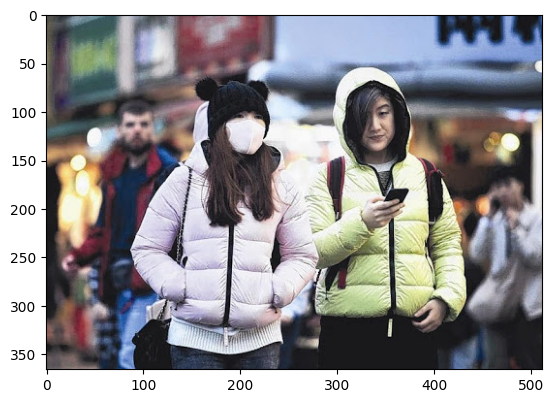

In [71]:
image_path = data_loc + image_file + ".png"

# Open the image file
img = Image.open(image_path)

# Display the image
plt.imshow(img)
plt.axis('on')  # Show axes for reference
plt.savefig(output_loc + image_file)
plt.show()


In [72]:
xml_path = data_loc + image_file + '.xml'

# Parse the XML file
tree = ET.parse(xml_path)
root = tree.getroot()

# Extract image size
size = root.find('size')
width = int(size.find('width').text)
height = int(size.find('height').text)

# Extract bounding boxes and labels
objects = []

for obj in root.findall('object'):
    label = obj.find('name').text
    bndbox = obj.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    objects.append({'label': label, 'bbox': (xmin, ymin, xmax, ymax)})


[{'label': 'without_mask', 'bbox': (79, 105, 109, 142)}, {'label': 'with_mask', 'bbox': (185, 100, 226, 144)}, {'label': 'without_mask', 'bbox': (325, 90, 360, 141)}]


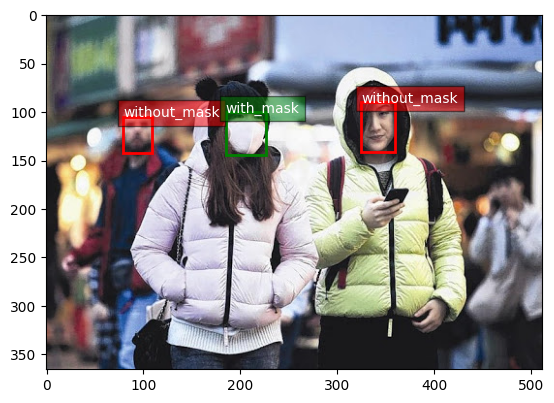

In [73]:
print(objects)

# Plot image with bounding boxes
fig, ax = plt.subplots(1)
ax.imshow(img)

# Add bounding boxes
for obj in objects:
    xmin, ymin, xmax, ymax = obj['bbox']
    label = obj['label']

    # Determine colors based on label
    if label == "with_mask":
        box_color = 'green'
    elif label == "without_mask":
        box_color = 'red'
    elif label == "mask_weared_incorrect":
        box_color = 'orange'
    else:
        # Default color if needed
        box_color = 'blue'

    # Draw bounding box
    rect = patches.Rectangle(
        (xmin, ymin),
        xmax - xmin,
        ymax - ymin,
        linewidth=2,
        edgecolor=box_color,
        facecolor='none'
    )
    ax.add_patch(rect)
    
    # Add label text with matching background color
    plt.text(
        xmin, ymin, label,
        bbox=dict(facecolor=box_color, alpha=0.5),
        color='white'  # Text color can be white for better contrast
    )

plt.savefig(output_loc + image_file + "_labeled")
plt.show()


without_mask: 717
mask_weared_incorrect: 123
with_mask: 3232


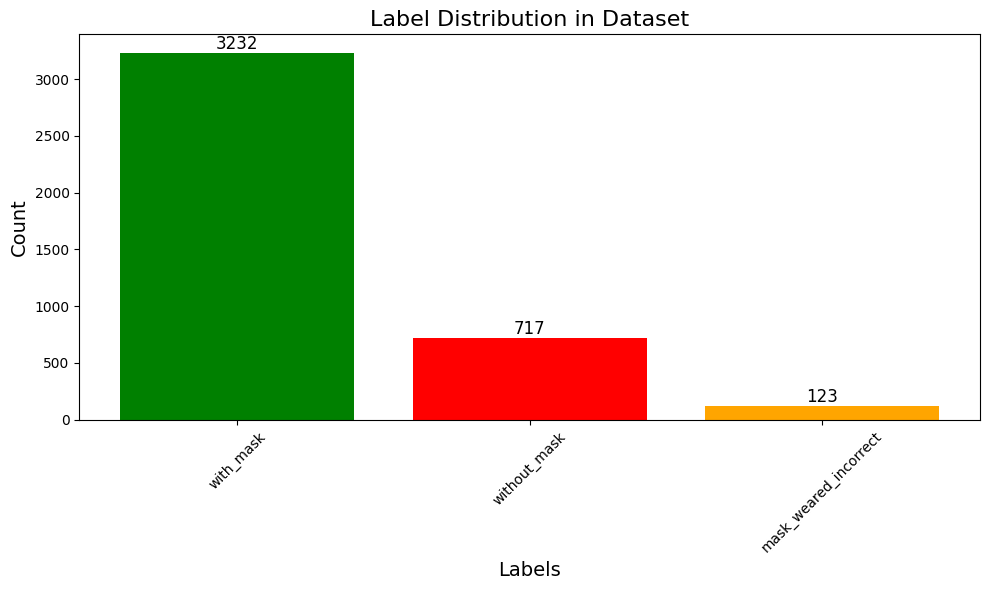

In [90]:
import os
import glob
from collections import Counter

# Get all files that end with ".xml"
xml_files = [file for file in os.listdir(data_loc) if file.endswith('.xml')]


# Dictionary to count labels
label_counts = Counter()

# Loop through all .xml files in the directory
for filename in xml_files:
    if filename.endswith('.xml'):
        file_path = os.path.join(data_loc, filename)
        # Parse the XML file
        tree = ET.parse(file_path)
        root = tree.getroot()
        
        # Find all object tags and their labels
        for obj in root.findall('object'):
            label = obj.find('name').text  # Extract label text
            label_counts[label] += 1  # Increment the label count

# Print the counts (optional)
for label, count in label_counts.items():
    print(f"{label}: {count}")

# Colors for the labels
colors = {
    "with_mask": "green",
    "without_mask": "red",
    "mask_weared_incorrect": "orange"
}

# Sort labels and counts by counts (descending order)
sorted_items = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)
sorted_labels, sorted_counts = zip(*sorted_items)

# Map colors to the sorted labels
sorted_colors = [colors[label] for label in sorted_labels]

# Plot the sorted histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_labels, sorted_counts, color=sorted_colors)

# Add labels on top of the bars
for bar, count in zip(bars, sorted_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             str(count), ha='center', va='bottom', fontsize=12)

# Add axis labels and title
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Label Distribution in Dataset', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.savefig(output_loc + "label_distribution")
plt.show()


In [ ]:
def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    objects = []

    for obj in root.findall('object'):
        label = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        objects.append({'label': label, 'bbox': (xmin, ymin, xmax, ymax)})
    return objects


def load_image(image_file):
    img = Image.open(image_file)
    return np.array(img)

def resize_image(image, size=(224, 224)):
    img = Image.fromarray(image)
    img = img.resize(size)
    return np.array(img)

def show_image_with_bbox(image, objects):
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Add bounding boxes
    for obj in objects:
        xmin, ymin, xmax, ymax = obj['bbox']
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(xmin, ymin, obj['label'], bbox=dict(facecolor='yellow', alpha=0.5))

    plt.show()

In [ ]:
import os
import glob

project_loc = '/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/Projects/573 - Mask Detection/Data/'

xml_files = glob.glob(os.path.join(project_loc, '*.xml'))
png_files = glob.glob(os.path.join(project_loc, '*.png'))

data = []

for xml_file in xml_files:
    # Find the corresponding image
    base_name = os.path.splitext(os.path.basename(xml_file))[0]
    image_file = os.path.join(project_loc, base_name + '.png')

    # Parse XML and load image
    objects = parse_annotation(xml_file)
    img = load_image(image_file)

    # Add to data list
    data.append({'image': img, 'objects': objects, 'image_file': image_file, 'xml_file': xml_file})


In [ ]:
from sklearn.model_selection import train_test_split

# Create the image and label lists
images = [item['image'] for item in data]
labels = [item['objects'] for item in data]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [ ]:
# Resize training and testing images
X_train_resized = [resize_image(img) for img in X_train]
X_test_resized = [resize_image(img) for img in X_test]

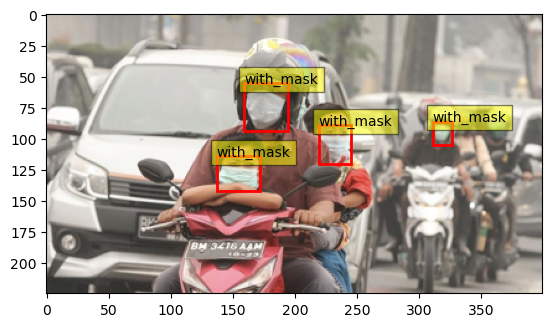

In [ ]:
# Show one example from the training set
show_image_with_bbox(X_train[1], y_train[1])

In [ ]:
(X_train_resized[0][0]).shape

(224, 4)

In [ ]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

import numpy as np
from PIL import Image

# Define a function to preprocess and resize the images
def preprocess_images(images, target_size=(128, 128)):
    processed_images = []
    for img in images:
        try:
            # Ensure image is in RGB format
            img_rgb = Image.fromarray(img).convert("RGB")  # Convert image to RGB
            # Resize the image to the target size
            img_resized = img_rgb.resize(target_size)
            img_array = np.array(img_resized) / 255.0  # Normalize the pixel values to [0, 1]
            processed_images.append(img_array)
        except Exception as e:
            print(f"Error processing image: {e}")
            continue  # Skip any problematic images
    return np.array(processed_images)

# Preprocess the images
X_train_preprocessed = preprocess_images(X_train)
X_test_preprocessed = preprocess_images(X_test)


In [ ]:
X_train_preprocessed.shape

(682, 128, 128, 3)

In [ ]:
def extract_labels(objects):
    labels = []
    for obj in objects:
        if any(o['label'] == 'with_mask' for o in obj):
            labels.append(1)  # 'with_mask'
        else:
            labels.append(0)  # 'without_mask'
    return np.array(labels)

# Extract labels for train and test sets
y_train_labels = extract_labels(y_train)
y_test_labels = extract_labels(y_test)

# One-hot encode the labels
y_train_encoded = to_categorical(y_train_labels, num_classes=2)
y_test_encoded = to_categorical(y_test_labels, num_classes=2)

In [ ]:
y_train_encoded.shape

(682, 2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
def create_baseline_model():
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes ('with_mask', 'without_mask')

    return model

# Create the model
model = create_baseline_model()

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_preprocessed, y_train_encoded,
                    validation_data=(X_test_preprocessed, y_test_encoded),
                    epochs=10,
                    batch_size=32)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 330ms/step - accuracy: 0.7896 - loss: 0.4962 - val_accuracy: 0.9006 - val_loss: 0.2551
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 338ms/step - accuracy: 0.9111 - loss: 0.2497 - val_accuracy: 0.9006 - val_loss: 0.2471
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 358ms/step - accuracy: 0.9001 - loss: 0.2904 - val_accuracy: 0.9006 - val_loss: 0.2480
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 398ms/step - accuracy: 0.8901 - loss: 0.2598 - val_accuracy: 0.9006 - val_loss: 0.2688
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 343ms/step - accuracy: 0.8847 - loss: 0.2601 - val_accuracy: 0.9006 - val_loss: 0.2544
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 359ms/step - accuracy: 0.8991 - loss: 0.2028 - val_accuracy: 0.9006 - val_loss: 0.4109
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 360ms/step - accuracy: 0.9114 - loss: 0.2123 - val_accuracy: 0.9006 - val_loss: 0.2559
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 357ms/step - accuracy: 0.9085 - loss: 0.1757 - val_accuracy: 0

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_preprocessed, y_test_encoded)
print(f'Test Accuracy: {test_acc:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9035 - loss: 0.3023
Test Accuracy: 0.90


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


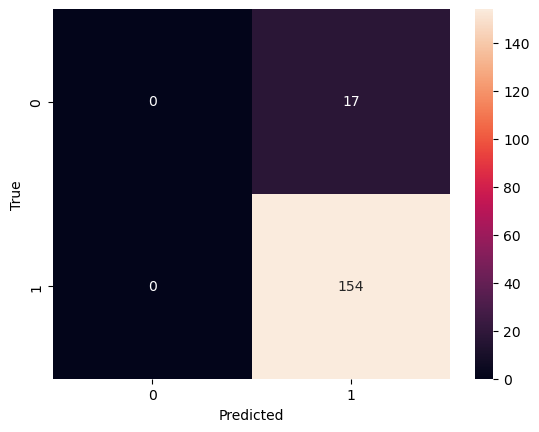

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_preprocessed)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import os
import numpy as np
import xml.etree.ElementTree as ET
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to parse XML annotation
def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    objects = []

    # Parse object details (bounding boxes and labels)
    for obj in root.findall('object'):
        label = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        objects.append({'label': label, 'bbox': (xmin, ymin, xmax, ymax)})
    return objects

# Load image from file
def load_image(image_file):
    img = Image.open(image_file)
    return np.array(img)

# Resize image
def resize_image(image, size=(224, 224)):
    img = Image.fromarray(image)
    img = img.resize(size)
    return np.array(img)

# Visualize image with bounding boxes (for verification)
def show_image_with_bbox(image, objects):
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Add bounding boxes
    for obj in objects:
        xmin, ymin, xmax, ymax = obj['bbox']
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(xmin, ymin, obj['label'], bbox=dict(facecolor='yellow', alpha=0.5))

    plt.show()

def prepare_dataset(image_dir, xml_dir, target_size=(128, 128)):
    images = []
    labels = []

    # Iterate over XML files
    for xml_file in os.listdir(xml_dir):
        if not xml_file.endswith('.xml'):
            continue

        # Parse annotation file
        annotation_path = os.path.join(xml_dir, xml_file)
        objects = parse_annotation(annotation_path)

        # Load corresponding image
        image_name = xml_file.replace('.xml', '.png')  # Assuming images are .png
        image_path = os.path.join(image_dir, image_name)
        if not os.path.exists(image_path):
            print(f"Image {image_name} not found, skipping.")
            continue

        # Load and preprocess the image
        try:
            img = Image.open(image_path).convert("RGB")  # Ensure the image is in RGB format
            img_resized = img.resize(target_size)  # Resize image to the target size
            img_array = np.array(img_resized) / 255.0  # Normalize the image
            images.append(img_array)  # Store the processed image
        except Exception as e:
            print(f"Error processing image {image_name}: {e}")
            continue  # Skip any problematic images

        # Extract the label from the first object (you can refine this logic for multiple labels)
        # Assuming the first object defines the primary label for the image
        if len(objects) > 0:
            label = objects[0]['label']  # Get the label from the first object
            if label == 'without_mask':
                labels.append(0)  # Class ID for "without mask"
            elif label == 'with_mask':
                labels.append(1)  # Class ID for "with mask"
            elif label == 'mask_weared_incorrect':
                labels.append(2)  # Class ID for "with mask incorrectly"

    return np.array(images), np.array(labels)  # Convert both images and labels to numpy arrays




# Project directory where your images and annotations are stored
project_loc = '/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/Projects/573 - Mask Detection/Data/'

# Prepare the dataset
X, y = prepare_dataset(project_loc, project_loc)

print(f"Dataset prepared: {X.shape[0]} images loaded.")
print(f"Number of labels: {len(y)}")


Dataset prepared: 853 images loaded.
Number of labels: 853


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X (images) and y (labels) are already prepared
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split sizes
print(f"Training set: {X_train.shape[0]} images")
print(f"Test set: {X_test.shape[0]} images")

Training set: 682 images
Test set: 171 images


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Simple CNN architecture for multi-class classification
def create_baseline_model():
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))  # 3 classes: without mask, with mask incorrectly, with mask correctly

    return model

# Instantiate the model
model = create_baseline_model()

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=3)  # 3 classes: without mask, with mask, with mask incorrectly
y_test_encoded = to_categorical(y_test, num_classes=3)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,  # Training images
    y_train_encoded,  # One-hot encoded labels for training
    validation_data=(X_test, y_test_encoded),  # Validation data (images and labels)
    epochs=3,  # Number of epochs
    batch_size=32  # Batch size
)

# Evaluate the model performance
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 374ms/step - accuracy: 0.8447 - loss: 0.5284 - val_accuracy: 0.8070 - val_loss: 0.5712
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 415ms/step - accuracy: 0.8046 - loss: 0.6024 - val_accuracy: 0.8070 - val_loss: 0.5607
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 356ms/step - accuracy: 0.8334 - loss: 0.4930 - val_accuracy: 0.8070 - val_loss: 0.6020
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8109 - loss: 0.5903
Test Accuracy: 0.8070


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


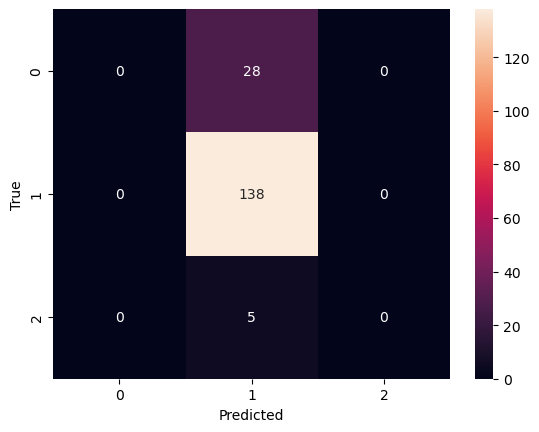

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_preprocessed)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


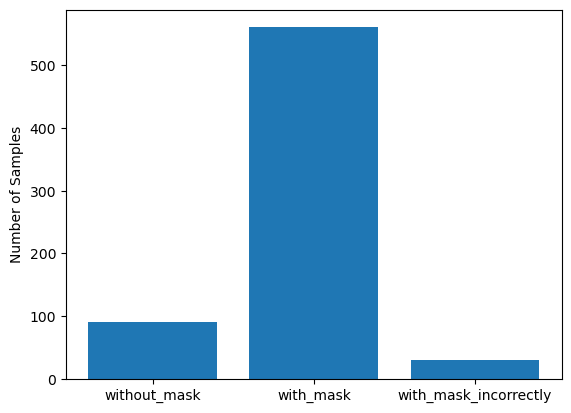

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Check class distribution
class_distribution = np.bincount(y_train)  # Replace y_train with the actual labels you're using
plt.bar(range(3), class_distribution)
plt.xticks(range(3), ['without_mask', 'with_mask', 'with_mask_incorrectly'])
plt.ylabel('Number of Samples')
plt.show()


In [ ]:
from sklearn.utils import class_weight

# Calculate class weights to handle imbalance
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),  # Replace y_train with your actual labels
    y=y_train
)

# Pass the class weights to model.fit
history = model.fit(
    X_train,
    y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=4,
    batch_size=32,
    class_weight=dict(enumerate(class_weights))  # Assign class weights
)


Epoch 1/4
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 345ms/step - accuracy: 0.7182 - loss: 0.6781 - val_accuracy: 0.5263 - val_loss: 0.9489
Epoch 2/4
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - accuracy: 0.7638 - loss: 0.5446 - val_accuracy: 0.7310 - val_loss: 0.7512
Epoch 3/4
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 337ms/step - accuracy: 0.7752 - loss: 0.4262 - val_accuracy: 0.5965 - val_loss: 0.9124
Epoch 4/4
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 332ms/step - accuracy: 0.7548 - loss: 0.3922 - val_accuracy: 0.6082 - val_loss: 0.9869


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


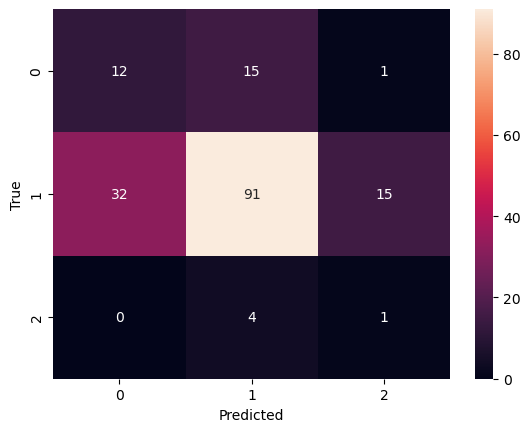

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_preprocessed)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
